In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# From Feb 11, 2024

## Goal

Collect a bit of real data that you would need/want to solve a specific problem.

## Steps


1. What feature data do you have/need?
2. What target data do you have/need?

In my research, I aim to train a **machine learning interatomic potential** for **molten salt**, specifically **FLiBe**. To train a high-quality potential, we need essential data that include **atomic positions and corresponding energies**. These can be primarily obtained from **DFT calculations**. 

However, when investigating the **Primary Knock-on Atom (PKA) process**, DFT alone is insufficient due to computational limitations. Therefore, **AIMD simulations** are necessary to supplement the dataset. AIMD can provide additional configurations and dynamical information that are difficult to capture using only static DFT calculations.

By integrating data from **DFT** and **AIMD**, we can construct a robust dataset that enhances the **accuracy and generalizability** of the machine learning interatomic potential. This approach is particularly crucial for studying **PKA-related processes** in molten salt systems.  

Currently, we have 90,000 frames in total.



In [ ]:
## Data exploration exercise

get data from Kaggle

In [ ]:
! cd /Users/wleng2/Library/CloudStorage/OneDrive-UniversityofIllinois-Urbana/Notability/MSE/598
! curl -L -o yeah-concret-data.zip https://www.kaggle.com/api/v1/datasets/download/maajdl/yeh-concret-data
! unzip yeah-concret-data.zip


now you can see

| cement | slag  | flyash | water | superplasticizer | coarseaggregate | fineaggregate | age | csMPa |

In [1]:
import pandas as pd
import numpy as np

In [5]:
!ls

Concrete_Data_Yeh.csv README.md             yeah-concret-data.zip
Feb11-13.ipynb        Untitled.ipynb
LICENSE               class_last_time.ipynb


In [5]:
df=pd.read_csv('Concrete_Data_Yeh.csv')

In [7]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
df.cement

0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: cement, Length: 1030, dtype: float64

In [9]:
df.cement.max()

540.0

In [10]:
df['Add_Random'] = np.random.rand(len(df))

In [11]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Add_Random
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.223687
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.099826
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.165922
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.663058
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.874453


In [12]:
df['water_add_Random'] = df['water'] + df['Add_Random']    

In [13]:
df.head()   

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Add_Random,water_add_Random
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.223687,162.223687
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.099826,162.099826
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.165922,228.165922
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.663058,228.663058
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.874453,192.874453


In [14]:
df['age']>100

0       False
1       False
2        True
3        True
4        True
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Name: age, Length: 1030, dtype: bool

In [15]:
df['water'].describe()

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64

In [6]:
df.head()   

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [17]:
df['csMPa'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: csMPa, dtype: float64

# plotting

In [18]:
import matplotlib.pyplot as plt 

In [19]:
y = df['csMPa']
x1 = df['water']
x2 = df['Add_Random']

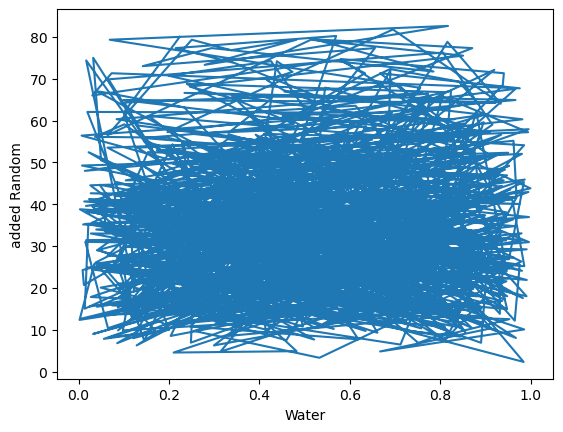

In [20]:
plt.xlabel('Water')
plt.ylabel('added Random')
plt.plot(x2, y)


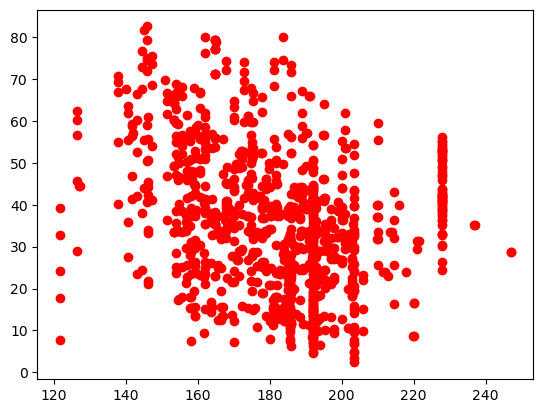

In [21]:
plt.scatter(x1, y,c='r')

(array([ 45., 133., 156., 181., 196., 112., 100.,  52.,  36.,  19.]),
 array([ 2.33 , 10.357, 18.384, 26.411, 34.438, 42.465, 50.492, 58.519,
        66.546, 74.573, 82.6  ]),
 <BarContainer object of 10 artists>)

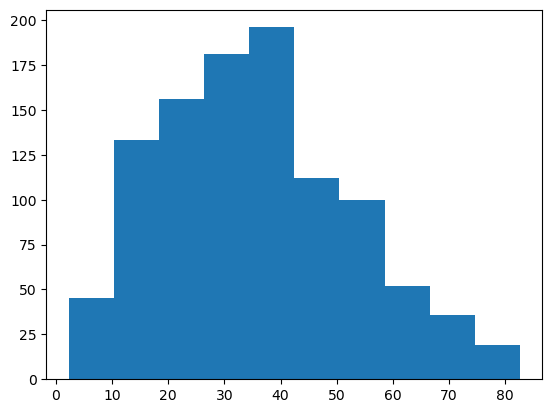

In [22]:
plt.hist(df['csMPa'])

In [23]:
import seaborn as sns

<Axes: xlabel='csMPa', ylabel='Count'>

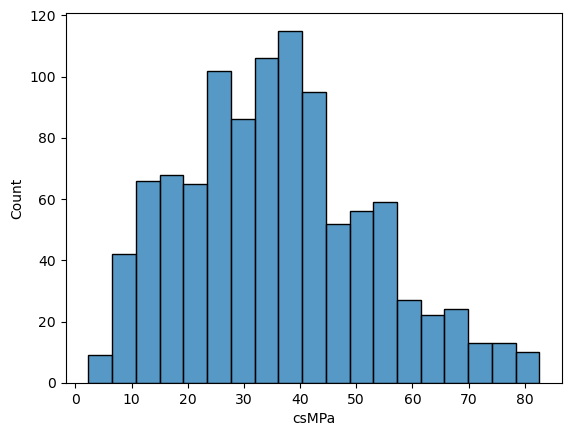

In [24]:
sns.histplot(df['csMPa'])

<Axes: xlabel='age', ylabel='Count'>

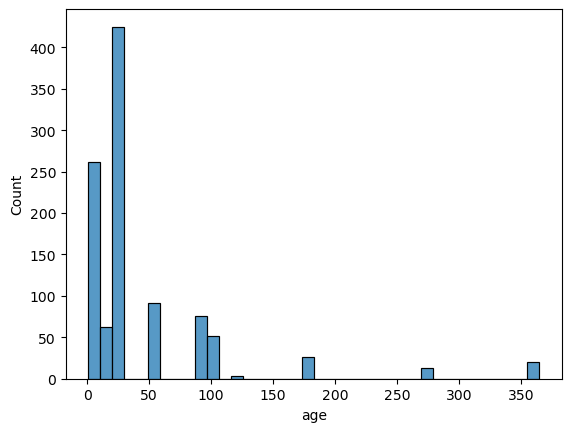

In [25]:
sns.histplot(df['age'])

In [26]:
df.age

0        28
1        28
2       270
3       365
4       360
       ... 
1025     28
1026     28
1027     28
1028     28
1029     28
Name: age, Length: 1030, dtype: int64

<Axes: >

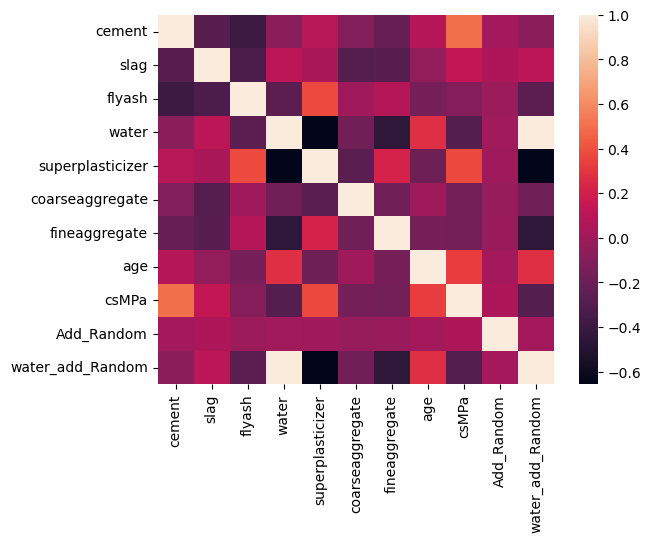

In [27]:
sns.heatmap(df.corr())

<Axes: >

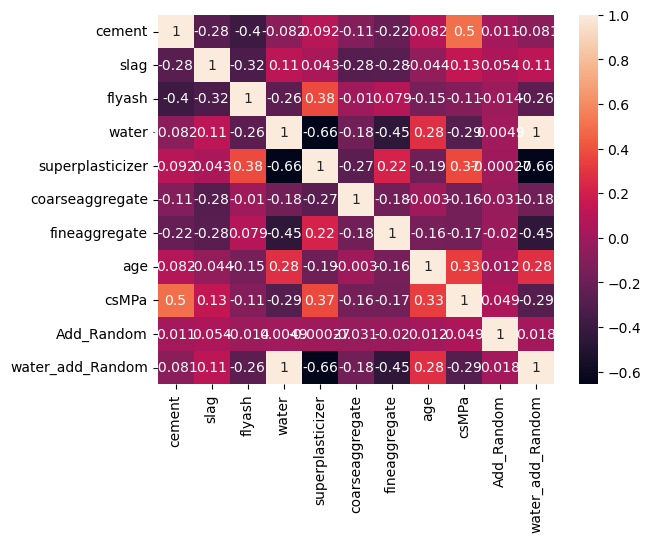

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
sns.hls_palette()

[(0.86, 0.3712, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999)]

In [30]:
sns.husl_palette()

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

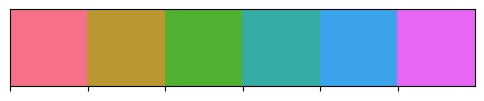

In [31]:
sns.palplot(sns.husl_palette())

## Feb 18
### Test/Validation Split Exercise
goal: produce test/validation splits with the scikit-learn library

In [32]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Add_Random,water_add_Random
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.223687,162.223687
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.099826,162.099826
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.165922,228.165922
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.663058,228.663058
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.874453,192.874453
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.208988,179.808988
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.312731,196.312731
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.476594,193.176594
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.076272,175.676272


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 加載數據
df = pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')

np.random.seed(2)

n = len(df)
n_val = int(0.2 * n)  
n_test = int(0.2 * n)  
n_train = n - (n_val + n_test)  

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]


X_train shape: (618, 4)
w shape: (3,)


ValueError: shapes (618,4) and (3,) not aligned: 4 (dim 1) != 3 (dim 0)

In the code above:
- 選擇water，spilt into test and validation， rate = 0.8， 然後用linear regression 去找這個權重w ，再用妳合出來的mdoel去和validation比較